In [1]:
import pandas as pd
import math 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
from scipy.stats import norm
import seaborn
math.sqrt(24)

/Users/arnavshah/anaconda2/envs/ipykernel_py3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


4.898979485566356

# 99VARDaily Calculation

In [2]:
df1=pd.read_csv("/Users/arnavshah/Downloads/HW2/Assignment#2_PortfolioAsOfNov242017.csv")
print(df1)
df1['Amount'][6]

  Ticker         Amount
0    AUD     -5,540,000
1    EUR     16,230,000
2    GBP      3,170,000
3  GER30             25
4    NZD      3,170,000
5    CAD     -6,300,000
6    JPY  2,590,000,000
7    XAU         10,332


'2,590,000,000'

In [3]:
df=pd.read_csv("/Users/arnavshah/Downloads/HW2/Assignment#2_HourlyPricesAllAssetsNov152015ToNov242017.csv")
df2=df.loc[df['Ticker']=='USD/JPY']
df3=df.loc[df['Ticker']=='AUD/USD']
df4=df.loc[df['Ticker']=='EUR/GBP']
df5=df.loc[df['Ticker']=='EUR/JPY']
# 'EUR/USD' 'GBP/JPY' 'GBP/USD'
#  'NZD/USD' 'USD/CAD' 'USD/CHF' 'XAU/USD' 'XAG/USD' 'GER30'
df6=df.loc[df['Ticker']=='EUR/USD']
df7=df.loc[df['Ticker']=='GBP/JPY']
df8=df.loc[df['Ticker']=='GBP/USD']
df9=df.loc[df['Ticker']=='NZD/USD']
df10=df.loc[df['Ticker']=='USD/CAD']
df11=df.loc[df['Ticker']=='USD/CHF']
df12=df.loc[df['Ticker']=='XAU/USD']
# df12=df.loc[df['Ticker']=='XAU/USD']
df13=df.loc[df['Ticker']=='XAG/USD']
df20=df.loc[df['Ticker']=='GER30']
df2=df2.set_index(['Date'])
df6=df6.set_index(['Date'])
df8=df8.set_index(['Date'])
df9=df9.set_index(['Date'])
df10=df10.set_index(['Date'])
df12=df12.set_index(['Date'])
# 

print(df2)
# print(df3)
# # print(df4)
# # print(df5)
# print(df6)
# # print(df7)
# print(df8)
# print(df9)
# print(df10)
# print(df11)
# print(df12)
# print(df13)
# print(df20)
# # print(df15)

# df['Close'][160755]


                   Ticker    Close
Date                              
11/15/2015 18:00  USD/JPY  122.376
11/15/2015 19:00  USD/JPY  122.301
11/15/2015 20:00  USD/JPY  122.512
11/15/2015 21:00  USD/JPY  122.531
11/15/2015 22:00  USD/JPY  122.470
11/15/2015 23:00  USD/JPY  122.436
11/16/2015 00:00  USD/JPY  122.501
11/16/2015 01:00  USD/JPY  122.420
11/16/2015 02:00  USD/JPY  122.401
11/16/2015 03:00  USD/JPY  122.639
11/16/2015 04:00  USD/JPY  122.776
11/16/2015 05:00  USD/JPY  122.935
11/16/2015 06:00  USD/JPY  122.979
11/16/2015 07:00  USD/JPY  123.056
11/16/2015 08:00  USD/JPY  123.062
11/16/2015 09:00  USD/JPY  122.944
11/16/2015 10:00  USD/JPY  123.068
11/16/2015 11:00  USD/JPY  123.097
11/16/2015 12:00  USD/JPY  123.085
11/16/2015 13:00  USD/JPY  123.166
11/16/2015 14:00  USD/JPY  123.229
11/16/2015 15:00  USD/JPY  123.259
11/16/2015 16:00  USD/JPY  123.205
11/16/2015 17:00  USD/JPY  123.168
11/16/2015 18:00  USD/JPY  123.251
11/16/2015 19:00  USD/JPY  123.266
11/16/2015 20:00  US


last one GER30 

# Explain the meaning of 99Daily Var and the method to compute it –


# propose several approaches and explain benefits and drawbacks of each

In [4]:
print(df['Ticker'].unique())
-0.003115716348495613
-0.0018924469868134618

['USD/JPY' 'AUD/USD' 'EUR/GBP' 'EUR/JPY' 'EUR/USD' 'GBP/JPY' 'GBP/USD'
 'NZD/USD' 'USD/CAD' 'USD/CHF' 'XAU/USD' 'XAG/USD' 'GER30']


-0.0018924469868134618

# Percentage Change

In [5]:
def percentage(df):
    df['results']=df['returns'].pct_change()
# print(df)

def percentagec(df):
    df['results']=-df['returns'].pct_change()
#     print(df)


# Mean, Standard Deviation, Var By Parametric Method and by Historical Simulation

In [6]:
def msd(df):
    print(" ")
    print("Mean")
    m=np.mean(df['returns'].pct_change())
    print(m)
    print(" ")
    print("Standard Deviation")
    s=np.std(df['returns'].pct_change())
   
    print(s)
    df['returns'].pct_change().hist(normed=True,alpha=0.5,bins=40,histtype='stepfilled')
    x=np.linspace(m-3*s,m+3*s,100)
    plt.plot(x,mlab.normpdf(x,m,s),"r")
    
    print(" ")
    print("VAR BY parametric method")
    var99=(norm.ppf(1-0.99,m,s))*(df['returns'].iloc[-1])*(math.sqrt(24))
    var95=(norm.ppf(1-0.95,m,s))*(df['returns'].iloc[-1])*(math.sqrt(24))
    print("Var99")
    print(var99)
    print("Var95")
    print(var95)
    
    print(" ")
    print("VAR BY HISTORICAL SIMULATION")
    print("Var99")
    var99=(df['results'].quantile(0.01))*(df['returns'].iloc[-1])*(math.sqrt(24))
    
    var95=(df['results'].quantile(0.05))*(df['returns'].iloc[-1])*(math.sqrt(24))
    print(var99)
    print("Var95")
    print(var95)

 


# 1. USD/JPY

                   Ticker    Close       returns
Date                                            
11/15/2015 18:00  USD/JPY  122.376  2.116428e+07
11/15/2015 19:00  USD/JPY  122.301  2.117726e+07
11/15/2015 20:00  USD/JPY  122.512  2.114079e+07
11/15/2015 21:00  USD/JPY  122.531  2.113751e+07
11/15/2015 22:00  USD/JPY  122.470  2.114804e+07
11/15/2015 23:00  USD/JPY  122.436  2.115391e+07
11/16/2015 00:00  USD/JPY  122.501  2.114268e+07
11/16/2015 01:00  USD/JPY  122.420  2.115667e+07
11/16/2015 02:00  USD/JPY  122.401  2.115996e+07
11/16/2015 03:00  USD/JPY  122.639  2.111889e+07
11/16/2015 04:00  USD/JPY  122.776  2.109533e+07
11/16/2015 05:00  USD/JPY  122.935  2.106804e+07
11/16/2015 06:00  USD/JPY  122.979  2.106051e+07
11/16/2015 07:00  USD/JPY  123.056  2.104733e+07
11/16/2015 08:00  USD/JPY  123.062  2.104630e+07
11/16/2015 09:00  USD/JPY  122.944  2.106650e+07
11/16/2015 10:00  USD/JPY  123.068  2.104528e+07
11/16/2015 11:00  USD/JPY  123.097  2.104032e+07
11/16/2015 12:00  US

/Users/arnavshah/anaconda2/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/arnavshah/anaconda2/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  del sys.path[0]


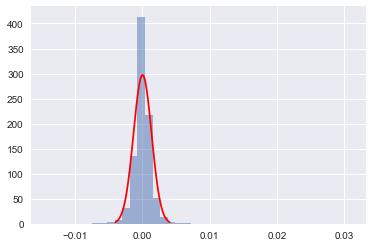

In [7]:
df2.Close.astype(float)
str1=df1.Amount[6]
str1=str1.replace(',','')
float(str1)
df2.loc[:,'returns']=0
df2.loc[:,'returns']= (float(str1))/(df2.loc[:,'Close'])


print(df2)
percentage(df2)
msd(df2) 


# 2. EUR/USD

                   Ticker    Close     returns
Date                                          
11/15/2015 18:00  EUR/USD  1.07364  17425177.2
11/15/2015 19:00  EUR/USD  1.07003  17366586.9
11/15/2015 20:00  EUR/USD  1.07217  17401319.1
11/15/2015 21:00  EUR/USD  1.07115  17384764.5
11/15/2015 22:00  EUR/USD  1.07176  17394664.8
11/15/2015 23:00  EUR/USD  1.07246  17406025.8
11/16/2015 00:00  EUR/USD  1.07196  17397910.8
11/16/2015 01:00  EUR/USD  1.07256  17407648.8
11/16/2015 02:00  EUR/USD  1.07268  17409596.4
11/16/2015 03:00  EUR/USD  1.07561  17457150.3
11/16/2015 04:00  EUR/USD  1.07376  17427124.8
11/16/2015 05:00  EUR/USD  1.07264  17408947.2
11/16/2015 06:00  EUR/USD  1.07203  17399046.9
11/16/2015 07:00  EUR/USD  1.07406  17431993.8
11/16/2015 08:00  EUR/USD  1.07307  17415926.1
11/16/2015 09:00  EUR/USD  1.07281  17411706.3
11/16/2015 10:00  EUR/USD  1.07044  17373241.2
11/16/2015 11:00  EUR/USD  1.07202  17398884.6
11/16/2015 12:00  EUR/USD  1.07087  17380220.1
11/16/2015 13

/Users/arnavshah/anaconda2/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  del sys.path[0]


 
VAR BY parametric method
Var99
-237237.35591066693
Var95
-167491.98184234413
 
VAR BY HISTORICAL SIMULATION
Var99
-273043.83695427084
Var95
-138118.503757934


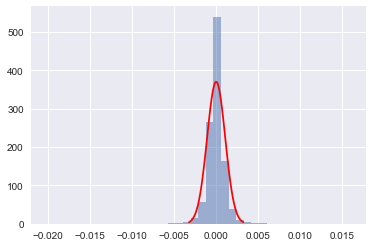

In [8]:

df15=df6
df15.Close.astype(float)
str1=df1.Amount[1]
str1=str1.replace(',','')
float(str1)
# df15=df6
df15.loc[:,'returns']=0
df15.loc[:,'returns']= (float(str1))*(df15.loc[:,'Close'])
print(df15)



percentage(df15)
msd(df15)


# 3. GBP/USD

 
Mean
-9.478060038760606e-06
 
Standard Deviation


/Users/arnavshah/anaconda2/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  del sys.path[0]


0.001409509707549805
 
VAR BY parametric method
Var99
-68088.33795117897
Var95
-48199.62220600758
 
VAR BY HISTORICAL SIMULATION
Var99
-75284.89672527771
Var95
-38861.52717464218


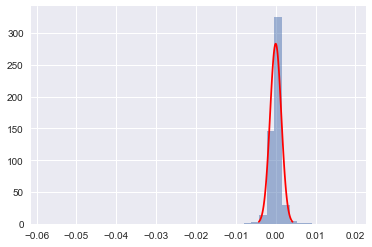

In [9]:
df8.Close.astype(float)
str1=df1.Amount[2]
str1=str1.replace(',','')
float(str1)
df8.loc[:,'returns']=0
df8.loc[:,'returns']= (float(str1))*(df8.loc[:,'Close'])

percentage(df8)
msd(df8) 

# 4. NZD/USD

 
Mean
5.146316197319866e-06
 
Standard Deviation
0.001449613625786897
 
VAR BY parametric method
Var99
-35973.72548616883
Var95
-25419.260714731554
 
VAR BY HISTORICAL SIMULATION
Var99
-41080.489855274725
Var95
-22506.304939372458


/Users/arnavshah/anaconda2/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  del sys.path[0]


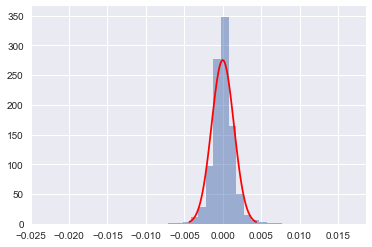

In [10]:

df9.Close.astype(float)
str1=df1.Amount[4]
str1=str1.replace(',','')
float(str1)
df9.loc[:,'returns']=0
df9.loc[:,'returns']= (float(str1))*(df9.loc[:,'Close'])

percentage(df9)
msd(df9) 

# 5. USD/CAD

 
Mean
4.272635792421588e-06
 
Standard Deviation
0.0011151932462360183
 
VAR BY parametric method
Var99
62884.156421620566
Var95
44432.10693112498
 
VAR BY HISTORICAL SIMULATION
Var99
77972.89584770543
Var95
39380.65283150829


/Users/arnavshah/anaconda2/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  del sys.path[0]


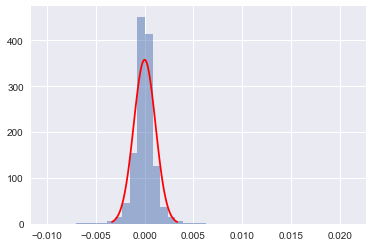

In [11]:
df10.Close.astype(float)
str1=df1.Amount[5]
str1=str1.replace(',','')
float(str1)
df10.loc[:,'returns']=0
df10.loc[:,'returns']= (float(str1))/(df10.loc[:,'Close'])


percentagec(df10)
msd(df10) 

# 6. USD/CHF

# 7. XAU/USD

                   Ticker    Close      returns
Date                                           
11/15/2015 18:00  XAU/USD  1083.48  11194515.36
11/15/2015 19:00  XAU/USD  1089.13  11252891.16
11/15/2015 20:00  XAU/USD  1089.47  11256404.04
11/15/2015 21:00  XAU/USD  1092.20  11284610.40
11/15/2015 22:00  XAU/USD  1092.25  11285127.00
11/15/2015 23:00  XAU/USD  1092.99  11292772.68
11/16/2015 00:00  XAU/USD  1093.05  11293392.60
11/16/2015 01:00  XAU/USD  1095.22  11315813.04
11/16/2015 02:00  XAU/USD  1097.75  11341953.00
11/16/2015 03:00  XAU/USD  1095.30  11316639.60
11/16/2015 04:00  XAU/USD  1092.22  11284817.04
11/16/2015 05:00  XAU/USD  1091.74  11279857.68
11/16/2015 06:00  XAU/USD  1092.84  11291222.88
11/16/2015 07:00  XAU/USD  1090.94  11271592.08
11/16/2015 08:00  XAU/USD  1092.96  11292462.72
11/16/2015 09:00  XAU/USD  1087.55  11236566.60
11/16/2015 10:00  XAU/USD  1084.90  11209186.80
11/16/2015 11:00  XAU/USD  1085.38  11214146.16
11/16/2015 12:00  XAU/USD  1085.38  1121

/Users/arnavshah/anaconda2/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  del sys.path[0]


 
VAR BY parametric method
Var99
-264442.507001322
Var95
-186679.3393772052
 
VAR BY HISTORICAL SIMULATION
Var99
-323602.39734993177
Var95
-159648.08464354824


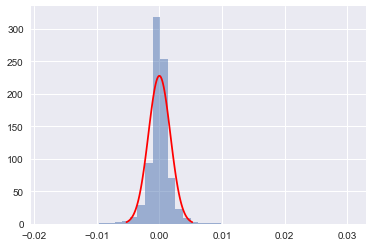

In [12]:
df12.Close.astype(float)
str1=df1.Amount[7]
str1=str1.replace(',','')
float(str1)
df12.loc[:,'returns']=0
df12.loc[:,'returns']= (float(str1))*(df12.loc[:,'Close'])
print(df12)


percentage(df12)
msd(df12) 

# 8. XAG/USD

# 9. EUR/GBP

# 10. EUR/JPY

# 11. GBP/JPY

# 12. GER30

In [13]:

ms = pd.merge(df6, df20, on=['Date'], how='inner')
ms
# ms['Close_x'].dropna()
ms=ms.set_index(['Date'])
ms

,Ticker_x,Close_x,returns,results,Ticker_y,Close_y
Date,,,,,,
11/16/2015 02:00,EUR/USD,1.07268,17409596.4,0.000112,GER30,10582.0
11/16/2015 03:00,EUR/USD,1.07561,17457150.3,0.002731,GER30,10590.0
11/16/2015 04:00,EUR/USD,1.07376,17427124.8,-0.001720,GER30,10676.5
11/16/2015 05:00,EUR/USD,1.07264,17408947.2,-0.001043,GER30,10714.5
11/16/2015 06:00,EUR/USD,1.07203,17399046.9,-0.000569,GER30,10722.5
11/16/2015 07:00,EUR/USD,1.07406,17431993.8,0.001894,GER30,10745.0
11/16/2015 08:00,EUR/USD,1.07307,17415926.1,-0.000922,GER30,10725.0
11/16/2015 09:00,EUR/USD,1.07281,17411706.3,-0.000242,GER30,10690.5
11/16/2015 10:00,EUR/USD,1.07044,17373241.2,-0.002209,GER30,10732.5


In [14]:

ms['results']=ms['Close_x']*ms['Close_y']
ms['results']=ms['results'].dropna()
ms.head(10)

ms['results'].isnull().values.any()
ms['results']=ms['results'].astype(float)
print(ms['results'])


Date
11/16/2015 02:00    11351.099760
11/16/2015 03:00    11390.709900
11/16/2015 04:00    11463.998640
11/16/2015 05:00    11492.801280
11/16/2015 06:00    11494.841675
11/16/2015 07:00    11540.774700
11/16/2015 08:00    11508.675750
11/16/2015 09:00    11468.875305
11/16/2015 10:00    11488.497300
11/16/2015 11:00    11469.005970
11/16/2015 12:00    11488.293360
11/16/2015 13:00    11497.235220
11/16/2015 14:00    11526.248140
11/16/2015 15:00    11520.602090
11/16/2015 16:00    11558.383920
11/16/2015 17:00    11556.909000
11/16/2015 18:00    11554.205250
11/16/2015 19:00    11558.423100
11/16/2015 20:00    11560.586100
11/16/2015 21:00    11534.846400
11/16/2015 22:00    11533.656750
11/16/2015 23:00    11528.790000
11/17/2015 00:00    11530.736700
11/17/2015 01:00    11531.277450
11/17/2015 02:00    11556.219325
11/17/2015 03:00    11510.589075
11/17/2015 04:00    11572.115610
11/17/2015 05:00    11615.318400
11/17/2015 06:00    11627.286290
11/17/2015 07:00    11640.444060
     

In [15]:
def msd(df):
    print(" ")
    print("Mean")
    m=np.mean(df['returns'].pct_change())
    print(m)
    print(" ")
    print("Standard Deviation")
    s=np.std(df['returns'].pct_change())
   
    print(s)
    df['returns'].pct_change().hist(normed=True,alpha=0.5,bins=40,histtype='stepfilled')
    x=np.linspace(m-3*s,m+3*s,100)
    plt.plot(x,mlab.normpdf(x,m,s),"r")
    
    print(" ")
    print("VAR BY parametric method")
    var99=(norm.ppf(1-0.99,m,s))*(df['returns'].iloc[-1])*(math.sqrt(24))
    var95=(norm.ppf(1-0.95,m,s))*(df['returns'].iloc[-1])*(math.sqrt(24))
    print("Var99")
    print(var99)
    print("Var95")
    print(var95)
    
    print(" ")
    print("VAR BY HISTORICAL SIMULATION")
    print("Var99")
    var99=(df['results'].quantile(0.01))*(df['returns'].iloc[-1])*(math.sqrt(24))
    
    var95=(df['results'].quantile(0.05))*(df['returns'].iloc[-1])*(math.sqrt(24))
    print(var99)
    print("Var95")
    print(var95)

Date
11/16/2015 02:00    7.094437e+06
11/16/2015 03:00    7.119194e+06
11/16/2015 04:00    7.164999e+06
11/16/2015 05:00    7.183001e+06
11/16/2015 06:00    7.184276e+06
11/16/2015 07:00    7.212984e+06
11/16/2015 08:00    7.192922e+06
11/16/2015 09:00    7.168047e+06
11/16/2015 10:00    7.180311e+06
11/16/2015 11:00    7.168129e+06
11/16/2015 12:00    7.180183e+06
11/16/2015 13:00    7.185772e+06
11/16/2015 14:00    7.203905e+06
11/16/2015 15:00    7.200376e+06
11/16/2015 16:00    7.223990e+06
11/16/2015 17:00    7.223068e+06
11/16/2015 18:00    7.221378e+06
11/16/2015 19:00    7.224014e+06
11/16/2015 20:00    7.225366e+06
11/16/2015 21:00    7.209279e+06
11/16/2015 22:00    7.208535e+06
11/16/2015 23:00    7.205494e+06
11/17/2015 00:00    7.206710e+06
11/17/2015 01:00    7.207048e+06
11/17/2015 02:00    7.222637e+06
11/17/2015 03:00    7.194118e+06
11/17/2015 04:00    7.232572e+06
11/17/2015 05:00    7.259574e+06
11/17/2015 06:00    7.267054e+06
11/17/2015 07:00    7.275278e+06
     

/Users/arnavshah/anaconda2/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


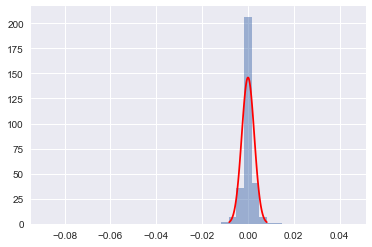

In [16]:

# print(df14)
# df14.loc[:,'Final']=df14['Close']*25
# df14=df14.rename(index=str,columns={"Close": "Closes", "EURO": "Close"})
# df14
# df14.Close.astype(float)
# print(ms['results'])

# str50=df1.Amount[3]
# str50=str50.replace(',','')
# float(str50)
# print(str50)
# df20.loc[:,'Final_Value']=1

# df20
#df14['Final_Value']=df14['Final_Value'].astype(float)
# print(df14.loc[:,'Final_Value'])
#print(ms['results'])
# if (df20['Date']!=ms['Date']):
Result=ms['results']*25*25
# Result 
df_f=Result
print(df_f)
# df20.loc[:,'Final_Value'].mul(ms['results'])
# print(df14.loc[:,'Final_Value'])
# df14.loc[:,'Final_Value']=(df14.loc[:,'Final_Value'])*(ms['results'].values)
# df20.loc[:,'Final_Value']=df20.loc[:,'Final_Value']*Result
# df20
df_f1=df_f.pct_change()
print(df_f1)
m1=np.mean(df_f1)
s1=np.std(df_f1)
print(m1)
print(s1)
df_f1.hist(normed=True,alpha=0.5,bins=40,histtype='stepfilled')
x=np.linspace(m1-3*s1,m1+3*s1,100)
plt.plot(x,mlab.normpdf(x,m1,s1),"r")
    
print(" ")
print("VAR BY parametric method")
var99=(norm.ppf(1-0.99,m1,s1))*(df_f.iloc[-1])*(math.sqrt(24))
var95=(norm.ppf(1-0.95,m1,s1))*(df_f.iloc[-1])*(math.sqrt(24))
print("Var99")
print(var99)
print("Var95")
print(var95)
    
print(" ")
print("VAR BY HISTORICAL SIMULATION")
print("Var99")
var99=(df_f1.quantile(0.01))*(df_f.iloc[-1])*(math.sqrt(24))
    
var95=(df_f1.quantile(0.05))*(df_f.iloc[-1])*(math.sqrt(24))
print(var99)
print("Var95")
print(var95)


# 13. AUD/USD

 
Mean
6.2483661897626145e-06
 
Standard Deviation
0.0013321522925019119
 
VAR BY parametric method
Var99
63929.31349361397
Var95
45163.64267271165
 
VAR BY HISTORICAL SIMULATION
Var99
75634.97574134525
Var95
40366.124193809905


/Users/arnavshah/anaconda2/envs/ipykernel_py3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/arnavshah/anaconda2/envs/ipykernel_py3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/arnavshah/anaconda2/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,Ticker,Date,Close,returns,results
12645,AUD/USD,11/15/2015 18:00,0.71170,-3942818.0,NaN
12646,AUD/USD,11/15/2015 19:00,0.71070,-3937278.0,0.001405
12647,AUD/USD,11/15/2015 20:00,0.71022,-3934618.8,0.000675
12648,AUD/USD,11/15/2015 21:00,0.71058,-3936613.2,-0.000507
12649,AUD/USD,11/15/2015 22:00,0.71158,-3942153.2,-0.001407
12650,AUD/USD,11/15/2015 23:00,0.71154,-3941931.6,0.000056
12651,AUD/USD,11/16/2015 00:00,0.71142,-3941266.8,0.000169
12652,AUD/USD,11/16/2015 01:00,0.71115,-3939771.0,0.000380
12653,AUD/USD,11/16/2015 02:00,0.71164,-3942485.6,-0.000689
12654,AUD/USD,11/16/2015 03:00,0.71269,-3948302.6,-0.001475


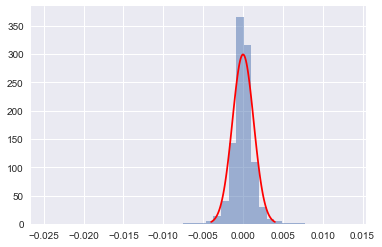

In [17]:
df3.Close.astype(float)
str1=df1.Amount[0]
str1=str1.replace(',','')
float(str1)
df3.loc[:,'returns']=0
df3.loc[:,'returns']= (float(str1))*(df3.loc[:,'Close'])


percentagec(df3)
msd(df3) 
df3

In [70]:
# df_final = pd.DataFrame({
#     'col_1': [Result],
#     'col_2': [df3['returns']]
# })
# df8,df9,df10,df12
# frames = [df2, df15]
# resultss = pd.concat(frames)
# resultss
ms1 = pd.merge(df2, df15, on=['Date'], how='outer')
ms1= pd.merge(ms1, df8, on=['Date'], how='outer')
ms1=pd.merge(ms1, df9, on=['Date'], how='outer')
ms1=pd.merge(ms1, df10, on=['Date'], how='outer')
ms1=pd.merge(ms1, df12, on=['Date'], how='outer')
# ms1=pd.merge(ms1, df_f, on=['Date'], how='outer')
# ms2=pd.merge(df8, df9, on=['Date'], how='inner')
# # ms['Close_x'].dropna()
# ms1=ms1.set_index(['Date'])

# "b":df15['returns'],
# "c":df8['returns'],
# "d":df9['returns'],
# "e":df10['returns'],
# "f":df12['returns']]
# df_finals = pd.DataFrame(df_finals)
columns=['returns_x','returns_y']
ms1['returns'] = ms1[columns].sum(axis=1)
ms1

# df_finals[[ 'column_new_1', 'column_new_2','column_new_3']] = [df15['returns'],df8['returns']]

,Ticker_x,Close_x,returns_x,results_x,Ticker_y,Close_y,returns_y,results_y,Ticker_x,Close_x,...,results_y,Ticker_x,Close_x,returns_x,results_x,Ticker_y,Close_y,returns_y,results_y,returns
Date,,,,,,,,,,,,,,,,,,,,,
11/15/2015 18:00,USD/JPY,122.376,2.116428e+07,NaN,EUR/USD,1.07364,17425177.2,NaN,GBP/USD,1.52209,...,NaN,USD/CAD,1.33126,-4.732359e+06,NaN,XAU/USD,1083.48,11194515.36,NaN,5.194747e+07
11/15/2015 19:00,USD/JPY,122.301,2.117726e+07,0.000613,EUR/USD,1.07003,17366586.9,-0.003362,GBP/USD,1.52177,...,0.000107,USD/CAD,1.33181,-4.730404e+06,0.000413,XAU/USD,1089.13,11252891.16,0.005215,5.196140e+07
11/15/2015 20:00,USD/JPY,122.512,2.114079e+07,-0.001722,EUR/USD,1.07217,17401319.1,0.002000,GBP/USD,1.52097,...,-0.001163,USD/CAD,1.33269,-4.727281e+06,0.000660,XAU/USD,1089.47,11256404.04,0.000312,5.196135e+07
11/15/2015 21:00,USD/JPY,122.531,2.113751e+07,-0.000155,EUR/USD,1.07115,17384764.5,-0.000951,GBP/USD,1.52114,...,0.000291,USD/CAD,1.33189,-4.730120e+06,-0.000601,XAU/USD,1092.20,11284610.40,0.002506,5.196803e+07
11/15/2015 22:00,USD/JPY,122.470,2.114804e+07,0.000498,EUR/USD,1.07176,17394664.8,0.000569,GBP/USD,1.52125,...,0.000674,USD/CAD,1.33164,-4.731008e+06,-0.000188,XAU/USD,1092.25,11285127.00,0.000046,5.198983e+07
11/15/2015 23:00,USD/JPY,122.436,2.115391e+07,0.000278,EUR/USD,1.07246,17406025.8,0.000653,GBP/USD,1.52117,...,-0.000505,USD/CAD,1.33155,-4.731328e+06,-0.000068,XAU/USD,1092.99,11292772.68,0.000678,5.201309e+07
11/16/2015 00:00,USD/JPY,122.501,2.114268e+07,-0.000531,EUR/USD,1.07196,17397910.8,-0.000466,GBP/USD,1.52116,...,0.000015,USD/CAD,1.33177,-4.730547e+06,0.000165,XAU/USD,1093.05,11293392.60,0.000055,5.199515e+07
11/16/2015 01:00,USD/JPY,122.420,2.115667e+07,0.000662,EUR/USD,1.07256,17407648.8,0.000560,GBP/USD,1.52147,...,0.000934,USD/CAD,1.33089,-4.733674e+06,-0.000661,XAU/USD,1095.22,11315813.04,0.001985,5.204108e+07
11/16/2015 02:00,USD/JPY,122.401,2.115996e+07,0.000155,EUR/USD,1.07268,17409596.4,0.000112,GBP/USD,1.52234,...,0.000245,USD/CAD,1.33040,-4.735418e+06,-0.000368,XAU/USD,1097.75,11341953.00,0.002310,5.207398e+07


 
Mean
0.0008990375619998138
 
Standard Deviation
0.04472526669150496
 
VAR BY parametric method
Var99
-8230040.033178211
Var95
-5798068.931817633
 
VAR BY HISTORICAL SIMULATION
Var99
-18196443.428425085
Var95
-140859.68083487643


/Users/arnavshah/anaconda2/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  del sys.path[0]


,Ticker_x,Close_x,returns_x,results_x,Ticker_y,Close_y,returns_y,results_y,Ticker_x,Close_x,...,Ticker_x,Close_x,returns_x,results_x,Ticker_y,Close_y,returns_y,results_y,returns,results
Date,,,,,,,,,,,,,,,,,,,,,
11/15/2015 18:00,USD/JPY,122.376,2.116428e+07,NaN,EUR/USD,1.07364,17425177.2,NaN,GBP/USD,1.52209,...,USD/CAD,1.33126,-4.732359e+06,NaN,XAU/USD,1083.48,11194515.36,NaN,5.194747e+07,NaN
11/15/2015 19:00,USD/JPY,122.301,2.117726e+07,0.000613,EUR/USD,1.07003,17366586.9,-0.003362,GBP/USD,1.52177,...,USD/CAD,1.33181,-4.730404e+06,0.000413,XAU/USD,1089.13,11252891.16,0.005215,5.196140e+07,2.680811e-04
11/15/2015 20:00,USD/JPY,122.512,2.114079e+07,-0.001722,EUR/USD,1.07217,17401319.1,0.002000,GBP/USD,1.52097,...,USD/CAD,1.33269,-4.727281e+06,0.000660,XAU/USD,1089.47,11256404.04,0.000312,5.196135e+07,-9.568997e-07
11/15/2015 21:00,USD/JPY,122.531,2.113751e+07,-0.000155,EUR/USD,1.07115,17384764.5,-0.000951,GBP/USD,1.52114,...,USD/CAD,1.33189,-4.730120e+06,-0.000601,XAU/USD,1092.20,11284610.40,0.002506,5.196803e+07,1.284680e-04
11/15/2015 22:00,USD/JPY,122.470,2.114804e+07,0.000498,EUR/USD,1.07176,17394664.8,0.000569,GBP/USD,1.52125,...,USD/CAD,1.33164,-4.731008e+06,-0.000188,XAU/USD,1092.25,11285127.00,0.000046,5.198983e+07,4.194997e-04
11/15/2015 23:00,USD/JPY,122.436,2.115391e+07,0.000278,EUR/USD,1.07246,17406025.8,0.000653,GBP/USD,1.52117,...,USD/CAD,1.33155,-4.731328e+06,-0.000068,XAU/USD,1092.99,11292772.68,0.000678,5.201309e+07,4.473940e-04
11/16/2015 00:00,USD/JPY,122.501,2.114268e+07,-0.000531,EUR/USD,1.07196,17397910.8,-0.000466,GBP/USD,1.52116,...,USD/CAD,1.33177,-4.730547e+06,0.000165,XAU/USD,1093.05,11293392.60,0.000055,5.199515e+07,-3.448733e-04
11/16/2015 01:00,USD/JPY,122.420,2.115667e+07,0.000662,EUR/USD,1.07256,17407648.8,0.000560,GBP/USD,1.52147,...,USD/CAD,1.33089,-4.733674e+06,-0.000661,XAU/USD,1095.22,11315813.04,0.001985,5.204108e+07,8.834698e-04
11/16/2015 02:00,USD/JPY,122.401,2.115996e+07,0.000155,EUR/USD,1.07268,17409596.4,0.000112,GBP/USD,1.52234,...,USD/CAD,1.33040,-4.735418e+06,-0.000368,XAU/USD,1097.75,11341953.00,0.002310,5.207398e+07,6.320640e-04


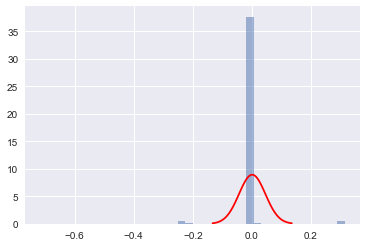

In [71]:

percentage(ms1)
msd(ms1) 
ms1

# Conclusions